<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/tapseq/tapseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Tue Oct  4 20:04:05 UTC 2022


In [2]:
import sys
COLAB = "google.colab" in sys.modules

if COLAB:
  !pip install -U matplotlib
  !pip install --quiet kb-python 
  !pip install --quiet --no-deps -i https://test.pypi.org/simple/ diffmx==0.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.6 MB/s 
     |████████████████████████████████| 960 kB 8.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


     |████████████████████████████████| 7.5 MB 5.3 MB/s 
     |████████████████████████████████| 96 kB 4.4 MB/s 
     |████████████████████████████████| 4.8 MB 52.2 MB/s 
     |████████████████████████████████| 45.2 MB 1.6 MB/s 
     |████████████████████████████████| 2.0 MB 38.7 MB/s 
     |████████████████████████████████| 15.1 MB 21.4 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 1.1 MB 65.6 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


In [1]:
name_map = {'CCNE2_+_95907328.23-P1P2' : 'CCNE2-A',
'CCNE2_+_95907382.23-P1P2' : 'CCNE2-B',
'CCNE2_+_95907406.23-P1P2' : 'CCNE2-C',
'CCNE2_-_95907017.23-P1P2' : 'CCNE2-D',
'CPQ_+_97657557.23-P1P2' : 'CPQ-A',
'CPQ_+_97657573.23-P1P2' : 'CPQ-B',
'CPQ_-_97657567.23-P1P2' : 'CPQ-C',
'CPQ_-_97657591.23-P1P2' : 'CPQ-D',
'DSCC1_+_120867694.23-P1P2' : 'DSCC1-A',
'DSCC1_+_120868042.23-P1P2' : 'DSCC1-B',
'DSCC1_-_120867704.23-P1P2' : 'DSCC1-C',
'DSCC1_-_120868119.23-P1P2' : 'DSCC1-D',
'FAM83A_+_124194986-P1P2' : 'FAM83A-A',
'FAM83A_+_124195012-P1P2' : 'FAM83A-B',
'FAM83A_-_124194976-P1P2' : 'FAM83A-C',
'FAM83A_-_124194996-P1P2' : 'FAM83A-D',
'GATA1-A' : 'GATA1-A',
'GATA1-B' : 'GATA1-B',
'GATA1-C' : 'GATA1-C',
'GATA1-D' : 'GATA1-D',
'HS2-A' : 'HS2-A',
'HS2-B' : 'HS2-B',
'HS2-C' : 'HS2-C',
'HS2-D' : 'HS2-D',
'LRRCC1_+_86019483.23-P1P2' : 'LRRCC1-A',
'LRRCC1_+_86019509.23-P1P2' : 'LRRCC1-B',
'LRRCC1_+_86019522.23-P1P2' : 'LRRCC1-C',
'LRRCC1_+_86019818.23-P1P2' : 'LRRCC1-D',
'MYC-A' : 'MYC-A',
'MYC-B' : 'MYC-B',
'MYC-C' : 'MYC-C',
'MYC-D' : 'MYC-D',
'OXR1_+_107670106.23' : 'OXR1-A',
'OXR1_+_107670159.23' : 'OXR1-B',
'OXR1_+_107670422.23' : 'OXR1-C',
'OXR1_-_107670413.23' : 'OXR1-D',
'PHF20L1_+_133787682-P1P2' : 'PHF20L1-A',
'PHF20L1_+_133788017-P1P2' : 'PHF20L1-B',
'PHF20L1_+_133788065-P1P2' : 'PHF20L1-C',
'PHF20L1_-_133787636-P1P2' : 'PHF20L1-D',
'RIPK2_+_90770127.23-P1P2' : 'RIPK2-A',
'RIPK2_+_90770318.23-P1P2' : 'RIPK2-B',
'RIPK2_-_90770297.23-P1P2' : 'RIPK2-C',
'RIPK2_-_90770465.23-P1P2' : 'RIPK2-D',
'STK3_+_99837558.23-P1P2' : 'STK3-A',
'STK3_+_99837574.23-P1P2' : 'STK3-B',
'STK3_+_99837894.23-P1P2' : 'STK3-C',
'STK3_-_99837866.23-P1P2' : 'STK3-D',
'UBR5_+_103424908.23-P1P2' : 'UBR5-A',
'UBR5_+_103424940.23-P1P2' : 'UBR5-B',
'UBR5_-_103424644.23-P1P2' : 'UBR5-C',
'UBR5_-_103424857.23-P1P2' : 'UBR5-D',
'ZFPM2-A' : 'ZFPM2-A',
'ZFPM2-B' : 'ZFPM2-B',
'ZFPM2-C' : 'ZFPM2-C',
'ZFPM2-D' : 'ZFPM2-D',
'non-targeting_00000' : 'NT0',
'non-targeting_00001' : 'NT1',
'non-targeting_00002' : 'NT2',
'non-targeting_00003' : 'NT3',
'non-targeting_00004' : 'NT4',
'non-targeting_00005' : 'NT5',
'non-targeting_00006' : 'NT6',
'non-targeting_00007' : 'NT7',
'non-targeting_00008' : 'NT8',
'non-targeting_00009' : 'NT9',
'non-targeting_00010' : 'NT10',
'non-targeting_00011' : 'NT11',
'non-targeting_00012' : 'NT12',
'non-targeting_00013' : 'NT13',
'non-targeting_00014' : 'NT14',
'non-targeting_00015' : 'NT15',
'non-targeting_00016' : 'NT16',
'non-targeting_00017' : 'NT17',
'non-targeting_00018' : 'NT18',
'non-targeting_00019' : 'NT19',
'non-targeting_00020' : 'NT20',
'non-targeting_00021' : 'NT21',
'non-targeting_00022' : 'NT22',
'non-targeting_00023' : 'NT23',
'non-targeting_00024' : 'NT24',
'non-targeting_00025' : 'NT25',
'non-targeting_00026' : 'NT26',
'non-targeting_00027' : 'NT27',
'non-targeting_00028' : 'NT28',
'non-targeting_00029' : 'NT29'}

In [4]:
!rm -rf BMGP_2020
!git clone https://github.com/sbooeshaghi/BMGP_2020.git

Cloning into 'BMGP_2020'...
remote: Enumerating objects: 1104, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 1104 (delta 124), reused 256 (delta 114), pack-reused 817
Receiving objects: 100% (1104/1104), 495.52 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (448/448), done.
Checking out files: 100% (155/155), done.


In [5]:
# extract everything
!ls /content/BMGP_2020/data/tapseq/*/*.tar.gz |xargs -n1 tar -xf

# Imports

In [2]:
import anndata
from scipy.io import mmread, mmwrite
from kb_python.utils import import_matrix_as_anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming, jaccard

from diffmx import plot, compare
from diffmx.utils import nd, yex

fsize = 18

plt.rcParams.update({'font.size': fsize})

%config InlineBackend.figure_format = 'retina'

colors = {
    "kb": "black",
    "ts": "red"
}

In [3]:
import sys
COLAB = "google.colab" in sys.modules

In [4]:
path = "kite/counts_unfiltered/adata.h5ad"
if COLAB:
  path = "/content/counts_unfiltered/adata.h5ad"

raw_kb = anndata.read_h5ad(path)
raw_kb.var = raw_kb.var.rename(columns={"gene_name": "feature_name"})

In [5]:
ts_data_path = "/home/sina/projects/kite/BMGP_2020/data/tapseq/ref/GSM4012688_TASC_DIFFEX_sample1.pertStatus.csv.gz"
if COLAB:
  ts_data_path = "/content/BMGP_2020/data/tapseq/ref/GSM4012688_TASC_DIFFEX_sample1.pertStatus.csv.gz"
ts_data = pd.read_csv(ts_data_path, index_col=0)

In [6]:
gene_names = pd.DataFrame(index=ts_data.index.values)
barcode_names = pd.DataFrame(index = np.array([x.split("-")[-1] for x in ts_data.columns.values]))
mtx = ts_data.values.T

In [7]:
raw_ts = anndata.AnnData(X=mtx.astype(int), obs=barcode_names, var = gene_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [8]:
raw_ts.var["feature_name"] = raw_ts.var.index.map(name_map)
raw_ts.var["feature_name_details"] = raw_ts.var.index.values
raw_ts.var.index = raw_ts.var["feature_name"]

In [9]:
common = np.intersect1d(np.intersect1d(raw_ts.obs.index.values, raw_kb.obs.index.values), barcode_names.index.values)

In [10]:
kb = raw_kb[raw_kb.obs.index.isin(common)]
ts = raw_ts[raw_ts.obs.index.isin(common)]

In [11]:
print(kb)
print(ts)

View of AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name'
View of AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name', 'feature_name_details'


In [12]:
common_genes = np.intersect1d(kb.var.index.values, ts.var.index.values)

In [13]:
kb = kb[:,kb.var.index.isin(common_genes)].copy()
ts = ts[:,ts.var.index.isin(common_genes)].copy()

In [14]:
ts

AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name', 'feature_name_details'

In [15]:
print(kb)
print(ts)

AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name'
AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name', 'feature_name_details'


In [16]:
False in (kb.obs.index.values == ts.obs.index.values)

False

In [17]:
False in (kb.var.index.values == ts.var.index.values)

True

In [18]:
kb = kb[:,~kb.var.feature_name.str.contains("Non-Targeting")].copy()
ts = ts[:,~ts.var.feature_name.str.contains("Non-Targeting")].copy()

In [19]:
kb = kb[:,kb.var.sort_index().index]
ts = ts[:,ts.var.sort_index().index]

In [20]:
False in (kb.obs.index.values == ts.obs.index.values)

False

In [21]:
False in (kb.var.index.values == ts.var.index.values)

False

In [22]:
print(kb)
print(ts)

View of AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name'
View of AnnData object with n_obs × n_vars = 10860 × 86
    var: 'feature_name', 'feature_name_details'


In [23]:
kb.layers["assignment"] = (kb.X>8).astype(int)

In [24]:
ts.X = ts.X.astype(int)

In [25]:
kb.layers[0] = kb.layers["assignment"]
kb.layers[1] = ts.X

# kb.write_h5ad("tapseq.h5ad")

# Visualizations

### hamming

In [26]:
ham = np.array([hamming(kb.layers["assignment"][i].todense(), ts.X[i]) for i in range(kb.shape[0])])
jac = np.array([jaccard(kb.layers["assignment"][i].todense(), ts.X[i]) for i in range(kb.shape[0])])

In [27]:
pd.Series(jac).value_counts()

0.000000    10621
1.000000      181
0.500000       47
0.333333        9
0.250000        1
0.200000        1
dtype: int64

In [28]:
pd.Series(jac).value_counts()/pd.Series(jac).value_counts().values.sum()*100

0.000000    97.799263
1.000000     1.666667
0.500000     0.432781
0.333333     0.082873
0.250000     0.009208
0.200000     0.009208
dtype: float64

In [29]:
kb[jac!=1].X.sum(1).mean()

57.979588

In [30]:
kb[jac==1].X.sum(1).mean()

7.154696

In [31]:
kb[np.logical_or(jac!=1, jac!=0)].X.sum(1).mean()

57.132504

In [32]:
 0.432781 +0.082873 +0.009208 +0.009208

0.53407

## Knee

## pseudobulk

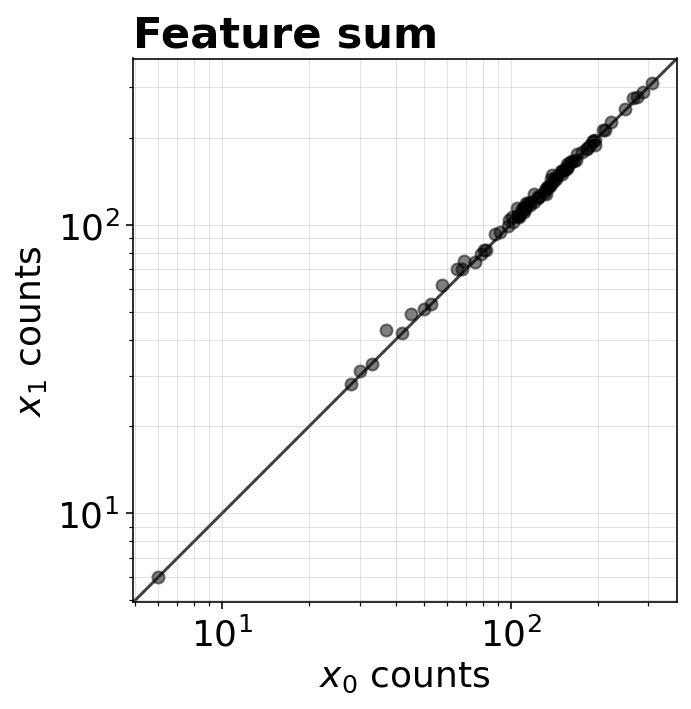

In [33]:
fig, ax = plt.subplots(figsize=(5,5))

x0, x1 = compare.cmp_sum(kb.layers["assignment"], ts.X)
plot.cmp_sum(x0, x1, ax=ax, alpha=0.5)

fig.show()

# Pseudobulk - cell

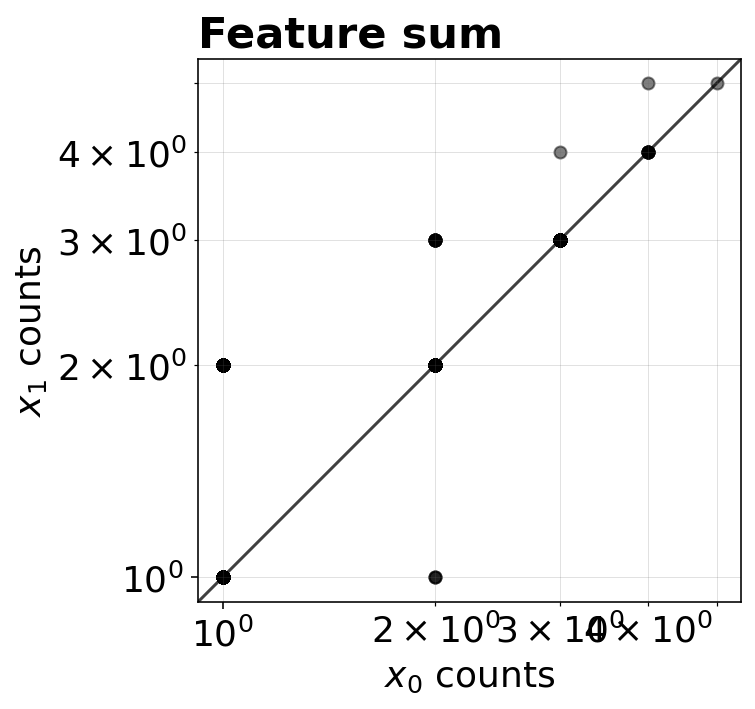

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

x0, x1 = compare.cmp_sum(kb.layers["assignment"], ts.X, axis=1)
plot.cmp_sum(x0, x1, ax=ax, alpha=0.5)

fig.show()